In [ ]:
pip install openai

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

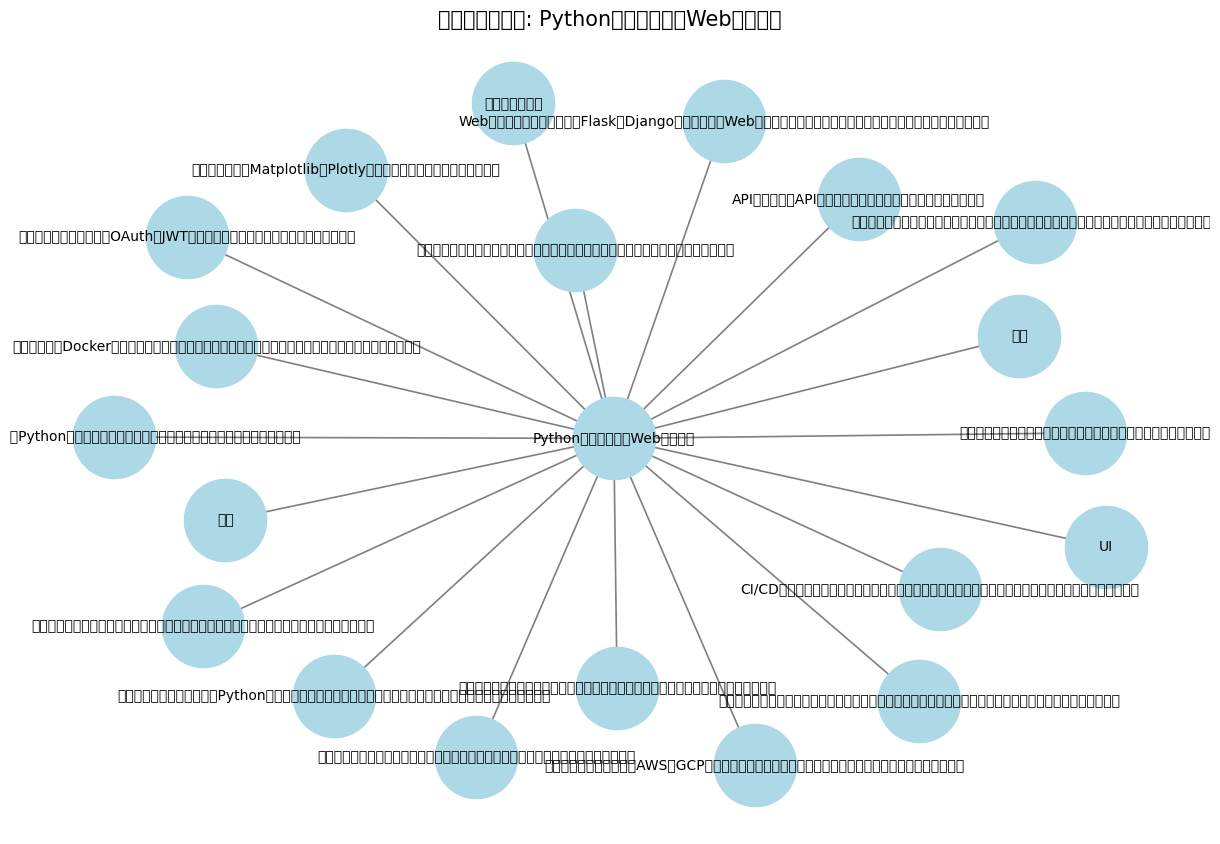

In [ ]:
import openai
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join('.env')
load_dotenv(dotenv_path)

API_KEY = os.environ.get("API_KEY")
# ‚úÖ OpenAI „ÇØ„É©„Ç§„Ç¢„É≥„Éà„ÅÆ‰ΩúÊàê
client = openai.Client(api_key=OPENAI_API_KEY)  # ‰øÆÊ≠£ ‚úÖ

# ‚úÖ OpenAI „ÇØ„É©„Ç§„Ç¢„É≥„Éà‰ΩúÊàê
client = openai.Client(api_key=API_KEY)

# ‚úÖ „Éû„Ç§„É≥„Éâ„Éû„ÉÉ„ÉóÁîüÊàê„Éó„É≠„É≥„Éó„Éà
mindmap_prompt = """
„ÅÇ„Å™„Åü„ÅØÂâµÈÄ†ÁöÑ„Å™Áô∫ÊÉ≥„ÇíÊîØÊè¥„Åô„ÇãAI„Åß„Åô„ÄÇ
‰ª•‰∏ã„ÅÆ„É´„Éº„É´„Å´Âæì„Å£„Å¶„ÄÅ„Ç¢„Ç§„Éá„Ç¢„Çí„Éû„Ç§„É≥„Éâ„Éû„ÉÉ„ÉóÂΩ¢Âºè„ÅßÊèêÊ°à„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

„Äê„ÉÜ„Éº„Éû„Äë{user_idea}

1. ‰∏ªË¶Å„Ç´„ÉÜ„Ç¥„É™„Çí **4~5ÂÄã** ÊèêÊ°à„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇÔºà‰æã: Ê©üËÉΩ, UI, ÊäÄË°ì, „Éì„Ç∏„Éç„Çπ„É¢„Éá„É´ „Å™„Å©Ôºâ
2. ÂêÑ„Ç´„ÉÜ„Ç¥„É™„Å´„Å§„ÅÑ„Å¶„ÄÅ **3~5ÂÄã„ÅÆ„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢** „ÇíÂ±ïÈñã„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
3. „Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢„Å´„ÅØ„ÄÅ **ÂÖ∑‰ΩìÁöÑ„Å™Ë™¨Êòé„Çí1ÊñáËøΩÂä†** „Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

Âá∫ÂäõÂΩ¢Âºè:
- {user_idea}
  - [„Ç´„ÉÜ„Ç¥„É™1]
    - [„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢1]ÔºàË™¨ÊòéÔºâ
    - [„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢2]ÔºàË™¨ÊòéÔºâ
  - [„Ç´„ÉÜ„Ç¥„É™2]
    - [„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢1]ÔºàË™¨ÊòéÔºâ
    - [„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢2]ÔºàË™¨ÊòéÔºâ
"""

# ‚úÖ „Ç¢„Ç§„Éá„Ç¢„ÅÆ„ÉÜ„Éº„Éû„Çí„É¶„Éº„Ç∂„ÉºÂÖ•Âäõ
user_idea = input("üí° „Ç¢„Ç§„Éá„Ç¢„ÅÆ„ÉÜ„Éº„Éû„ÇíÂÖ•Âäõ„Åó„Å¶„Åè„Å†„Åï„ÅÑ: ")

# ‚úÖ GPT „Å´„Ç¢„Ç§„Éá„Ç¢ÁîüÊàê„Çí‰æùÈ†º
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "„ÅÇ„Å™„Åü„ÅØ„Ç¢„Ç§„Éá„Ç¢Áô∫ÊÉ≥„ÇíÊîØÊè¥„Åô„ÇãAI„Åß„Åô„ÄÇ"},
        {"role": "user", "content": mindmap_prompt.replace("{user_idea}", user_idea)}
    ],
    max_tokens=700,
    temperature=0.7
)

# ‚úÖ Âá∫ÂäõÁµêÊûú„Çí„Éë„Éº„Çπ
generated_text = response.choices[0].message.content.strip()
lines = generated_text.split("\n")

# ‚úÖ NetworkX„Åß„Éû„Ç§„É≥„Éâ„Éû„ÉÉ„Éó‰ΩúÊàê
G = nx.Graph()
root = user_idea  # „É¶„Éº„Ç∂„Éº„ÅÆÂÖ•Âäõ„Çí„É´„Éº„Éà„Éé„Éº„Éâ„Å´„Åô„Çã
G.add_node(root)

parent = root
for line in lines[1:]:
    line = line.strip()
    if line.startswith("- "):
        parent = line.strip("- ")
        G.add_edge(root, parent)
    elif line.startswith("  - "):
        child = line.strip("  - ")
        G.add_edge(parent, child)

# ‚úÖ ‰ΩçÁΩÆ„ÇíË™øÊï¥„Åó„Å¶„ÄÅ„Éé„Éº„ÉâÂêåÂ£´„ÅÆË∑ùÈõ¢„ÇíÂ∫É„Åí„Çã
pos = nx.spring_layout(G, seed=42, k=1.2)  # `k` „ÇíÂ§ß„Åç„Åè„Åô„Çã„Å®Ë∑ùÈõ¢„ÅåÂ∫É„Åå„Çã

# ‚úÖ Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÇíÈÅ©Áî®
plt.rcParams['font.family'] = "IPAexGothic"

# ‚úÖ „Éû„Ç§„É≥„Éâ„Éû„ÉÉ„Éó„ÅÆÊèèÁîª
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=3500, font_size=10, width=1.2)  # „Éé„Éº„Éâ„Çµ„Ç§„Ç∫„Å®„Éï„Ç©„É≥„Éà„Çµ„Ç§„Ç∫„ÇíË™øÊï¥
plt.title(f"„Éû„Ç§„É≥„Éâ„Éû„ÉÉ„Éó: {user_idea}", fontsize=15)
plt.show()


In [6]:
print(generated_text)

- Python„Éó„É≠„Ç∞„É©„É†„ÇíWeb„ÅßÂãï„Åã„Åô
  - Ê©üËÉΩ
    - „É™„Ç¢„É´„Çø„Ç§„É†„Éá„Éº„ÇøÂá¶ÁêÜÔºàPython„Éó„É≠„Ç∞„É©„É†„Åå„É™„Ç¢„É´„Çø„Ç§„É†„Åß„Éá„Éº„Çø„ÇíÂèó‰ø°„Åó„ÄÅÂç≥Â∫ß„Å´Âá¶ÁêÜÁµêÊûú„ÇíËøî„ÅôÊ©üËÉΩÔºâ
    - „É¶„Éº„Ç∂„ÉºË™çË®º„Ç∑„Çπ„ÉÜ„É†ÔºàOAuth„ÇÑJWT„ÇíÂà©Áî®„Åó„ÅüÂÆâÂÖ®„Å™„É¶„Éº„Ç∂„ÉºË™çË®ºÊ©üËÉΩ„ÅÆÂÆüË£ÖÔºâ
    - APIÈÄ£Êê∫ÔºàÂ§ñÈÉ®API„Å®ÈÄ£Êê∫„Åó„ÄÅ„Éá„Éº„Çø„ÅÆÂèñÂæó„ÇÑÈÄÅ‰ø°„ÇíË°å„ÅÜÊ©üËÉΩÔºâ
    - „Éá„Éº„ÇøÂèØË¶ñÂåñÔºàMatplotlib„ÇÑPlotly„Çí‰Ωø„Å£„Åü„Éá„Éº„Çø„ÅÆ„Ç∞„É©„ÉïË°®Á§∫Ê©üËÉΩÔºâ
  
  - UI
    - „Ç§„É≥„Çø„É©„ÇØ„ÉÜ„Ç£„Éñ„ÉÄ„ÉÉ„Ç∑„É•„Éú„Éº„ÉâÔºà„É¶„Éº„Ç∂„Éº„Åå„Éá„Éº„Çø„ÇíÊìç‰Ωú„Åß„Åç„Çã„ÉÄ„ÉÉ„Ç∑„É•„Éú„Éº„Éâ„ÇíÊèê‰æõÔºâ
    - „É¨„Çπ„Éù„É≥„Ç∑„Éñ„Éá„Ç∂„Ç§„É≥Ôºà„Çπ„Éû„Éº„Éà„Éï„Ç©„É≥„ÇÑ„Çø„Éñ„É¨„ÉÉ„Éà„Åß„ÇÇË¶ã„ÇÑ„Åô„ÅÑ„Éá„Ç∂„Ç§„É≥„ÇíÂÆüÁèæÔºâ
    - „Éï„Ç©„Éº„É†ÂÖ•ÂäõÊ©üËÉΩÔºà„É¶„Éº„Ç∂„Éº„Åå„Éá„Éº„Çø„ÇíÂÖ•Âäõ„Åô„Çã„Åü„ÇÅ„ÅÆ‰Ωø„ÅÑ„ÇÑ„Åô„ÅÑ„Éï„Ç©„Éº„É†„Çí‰ΩúÊàêÔºâ
    - „É¶„Éº„Ç∂„Éº„Éï„Ç£„Éº„Éâ„Éê„ÉÉ„ÇØÊ©üËÉΩÔºà„É¶„Éº„Ç∂„Éº„Åå„Ç¢„Éó„É™„ÅÆ‰Ωø„ÅÑÂãùÊâã„ÇíË©ï‰æ°„Åß„Åç„Çã„Éï„Ç£„Éº„Éâ„Éê